# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [6]:
import os
os.listdir('.')

['lab_inbalance.ipynb',
 '.ipynb_checkpoints',
 'PS_20174392719_1491204439457_log.csv']

In [22]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

paysim = pd.read_csv('PS_20174392719_1491204439457_log.csv')


In [23]:
paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
paysim.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### What is the distribution of the outcome? 

<AxesSubplot:>

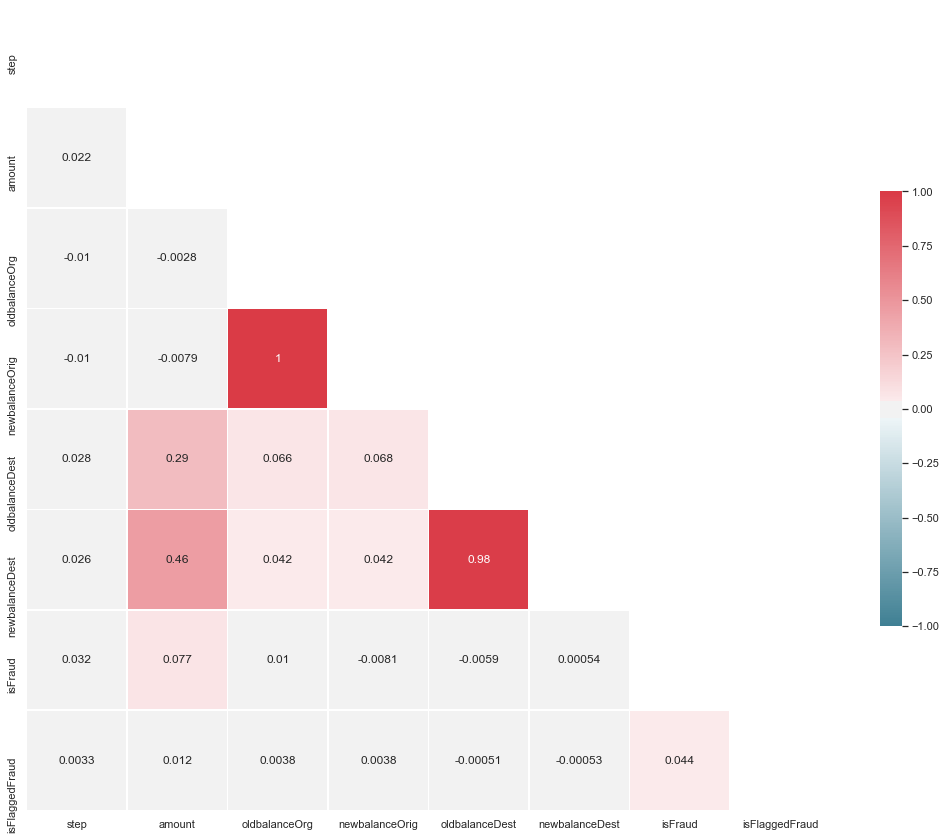

In [9]:
# Your response here
sns.set(style="white")
mask = np.triu(np.ones_like(paysim.corr(), dtype=np.bool))
f, ax = plt.subplots(figsize=(18, 16))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(paysim.corr(), mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1, square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5})

In [10]:
paysim.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
#The outcome variable is very unbalanced. 

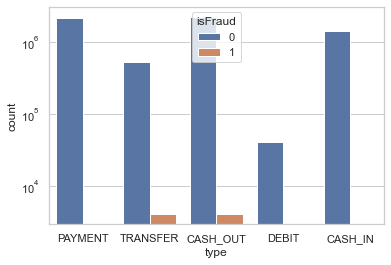

In [12]:
sns.set(style="whitegrid")
g = sns.countplot(paysim.type, hue=paysim.isFraud)
g.set_yscale("log")

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [11]:
# Your code here
paysim.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [12]:
paysim.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
paysim.step.unique

<bound method Series.unique of 0            1
1            1
2            1
3            1
4            1
          ... 
6362615    743
6362616    743
6362617    743
6362618    743
6362619    743
Name: step, Length: 6362620, dtype: int64>

In [15]:
paysim.nameOrig.unique

<bound method Series.unique of 0          C1231006815
1          C1666544295
2          C1305486145
3           C840083671
4          C2048537720
              ...     
6362615     C786484425
6362616    C1529008245
6362617    C1162922333
6362618    C1685995037
6362619    C1280323807
Name: nameOrig, Length: 6362620, dtype: object>

In [16]:
paysim.nameDest.unique

<bound method Series.unique of 0          M1979787155
1          M2044282225
2           C553264065
3            C38997010
4          M1230701703
              ...     
6362615     C776919290
6362616    C1881841831
6362617    C1365125890
6362618    C2080388513
6362619     C873221189
Name: nameDest, Length: 6362620, dtype: object>

In [26]:
paysim.drop(['step', 'nameOrig', 'nameDest','newbalanceOrig','newbalanceDest'], inplace=True, axis=1)

In [27]:
paysim.type.unique

<bound method Series.unique of 0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object>

In [28]:
paysim = paysim.loc[(paysim.type == 'TRANSFER') | (paysim.type == 'CASH_OUT')]

# One hot encoding for labelled data in type
paysim = pd.get_dummies(paysim, columns=['type'], drop_first=True)


In [35]:
paysim.rename(columns = {'type_TRANSFER':'type'}, inplace=True)

In [36]:
paysim.head()

,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,type
2,181.00,181.0,0.0,1,0,1
3,181.00,181.0,21182.0,1,0,0
15,229133.94,15325.0,5083.0,0,0,0
19,215310.30,705.0,22425.0,0,0,1
24,311685.89,10835.0,6267.0,0,0,1


### Run a logisitc regression classifier and evaluate its accuracy.

In [41]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [42]:
X = paysim.drop('isFraud',axis=1,inplace=False)
y = paysim['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
# transform the dataset
oversample = SMOTE()
res_X, res_y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(res_y)
print(counter)

Counter({1: 2762196, 0: 2762196})


In [44]:
X_train, X_test, y_train, y_test= train_test_split(res_X,res_y, test_size=0.33, random_state= 69)

In [45]:
model= LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9206109567827021

In [46]:
model.score(X_test, y_test)

0.9210175255752722

In [47]:
from sklearn.metrics import classification_report, accuracy_score

In [48]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92    911243
           1       0.89      0.96      0.92    911807

    accuracy                           0.92   1823050
   macro avg       0.92      0.92      0.92   1823050
weighted avg       0.92      0.92      0.92   1823050



### Now pick a model of your choice and evaluate its accuracy.

In [50]:
# Your code here
from sklearn.ensemble import RandomForestClassifier

In [51]:
forest = RandomForestClassifier()

In [52]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
forest.score(X_train, y_train)

1.0

In [54]:
forest.score(X_test, y_test)

0.9983231397932038

In [55]:
y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    911243
           1       1.00      1.00      1.00    911807

    accuracy                           1.00   1823050
   macro avg       1.00      1.00      1.00   1823050
weighted avg       1.00      1.00      1.00   1823050



### Which model worked better and how do you know?

In [2]:
# Your response here
#Random Forest worked better.